In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install git+https://github.com/AntoinePassemiers/Lexicon-Based-Sentiment-Analysis

  Cloning https://github.com/AntoinePassemiers/Lexicon-Based-Sentiment-Analysis to /private/var/folders/2k/b696_87d61s02g_hgdv98f4c0000gn/T/pip-req-build-i96wbo75
  Running command git clone -q https://github.com/AntoinePassemiers/Lexicon-Based-Sentiment-Analysis /private/var/folders/2k/b696_87d61s02g_hgdv98f4c0000gn/T/pip-req-build-i96wbo75
  Resolved https://github.com/AntoinePassemiers/Lexicon-Based-Sentiment-Analysis to commit 8373e166f1ce65754d8014cee696606de7242847
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lbsa

In [4]:
import os
from setuptools import setup, find_packages

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
sa_lexicon = lbsa.get_lexicon('sa', language='english', source='nrc')

In [7]:
sa_lexicon.dataframe

,unnamed: 0,english,afrikaans,albanian,amharic,arabic,armenian,azeerbaijani,basque,belarusian,...,yoruba,zulu,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,...,aback,back,0,0,0,0,0,0,0,0
1,1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,...,abacus,Abacus,0,0,0,0,0,0,0,1
2,2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,...,kọ silẹ,shiya,0,0,0,1,0,1,0,0
3,3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,...,abandoned,ishiyiwe,1,0,0,1,0,1,0,0
4,4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,...,abandonment,ukushiya,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14177,14177,zone,sone,zonë,ዞን,منطقة,գոտի,zona,zona,зона,...,ibi kan,indawo,0,0,0,0,0,0,0,0
14178,14178,zoo,dieretuin,kopsht zoologjik,መናፈሻ,حديقة حيوان,գազանանոց,zoo,zoologiko,заапарк,...,Ile ifihan oniruuru ẹranko,i-zoo,0,0,0,0,0,0,0,0
14179,14179,zoological,dierkundige,zoologjik,ዞኦሎጂካል,حيواني,կենդանաբանական,zooloji,zoologiko,заалагічны,...,zoological,zoological,0,0,0,0,0,0,0,0
14180,14180,zoology,dierkunde,zoologji,ዞኦሎጂ,علم الحيوان,կենդանաբանություն,zooloji,zoology,заалогія,...,Ẹkọ,i-zoology,0,0,0,0,0,0,0,0


In [8]:
train_original = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin-1')

In [9]:
train_2000 = train_original.head(2000)

In [10]:
train_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       2000 non-null   int64 
 1   ScreenName     2000 non-null   int64 
 2   Location       1591 non-null   object
 3   TweetAt        2000 non-null   object
 4   OriginalTweet  2000 non-null   object
 5   Sentiment      2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


In [11]:
data = train_2000[['OriginalTweet', 'Sentiment']]

In [12]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
# let's get the basic informations
def basic_info(df): 
    print(df.shape)
    print()
    print(df.isnull().sum())
    print()
    print(df.info()) 

In [14]:
basic_info(data)

(2000, 2)

OriginalTweet    0
Sentiment        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  2000 non-null   object
 1   Sentiment      2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


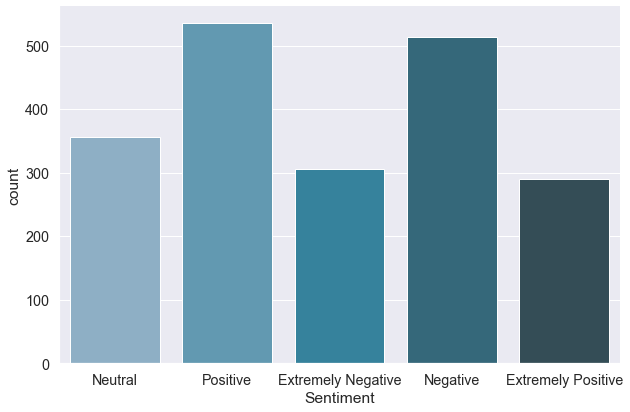

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.set(font_scale=1.3)

target_dist = sns.catplot(x='Sentiment', data=data, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

In [16]:
afinn_lexicon = lbsa.get_lexicon('opinion', language='english', source='afinn')
nrc_lexicon = lbsa.get_lexicon('opinion', language='english', source='nrc')
nrc_sa_lexicon = lbsa.get_lexicon('sa', language='english', source='nrc')
mpqa_lexicon = lbsa.get_lexicon('opinion', language='english', source='mpqa')

sa_extractor = lbsa.FeatureExtractor(afinn_lexicon, nrc_lexicon, nrc_sa_lexicon, mpqa_lexicon)
feat_dat = pd.DataFrame(sa_extractor.process(data['OriginalTweet']),columns=sa_extractor.feature_names)

In [17]:
feat_dat

,afinn_positive,afinn_negative,nrc_positive,nrc_negative,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_sadness,nrc_surprise,nrc_trust,mpqa_positive,mpqa_negative,mpqa_strong_subjectivty
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,5.0,2.0,0.0,0.0
2,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,4.0,4.0,5.0,2.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,4.0,4.0,2.0,4.0
4,1.0,6.0,2.0,3.0,2.0,1.0,0.0,3.0,1.0,2.0,0.0,2.0,2.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,1.0,5.0,3.0,3.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
1997,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1998,0.0,4.0,3.0,3.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,0.0,3.0,2.0


Descriptive stats for afinn_positive
------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  0.862745  1.350453  0.0  0.0  0.0  2.0   7.0
Extremely Positive  290.0  4.465517  2.565512  0.0  3.0  4.0  6.0  16.0
Negative            513.0  0.957115  1.381417  0.0  0.0  0.0  2.0   7.0
Neutral             356.0  0.238764  0.886050  0.0  0.0  0.0  0.0  11.0
Positive            535.0  2.042991  1.680473  0.0  1.0  2.0  3.0  10.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


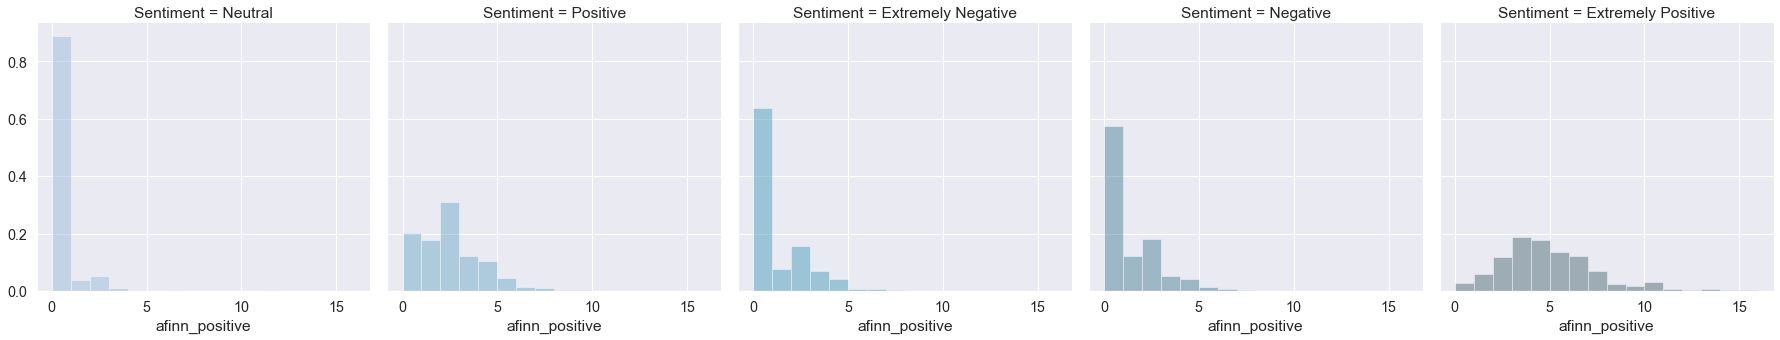

Descriptive stats for afinn_negative
------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  6.581699  3.184212  0.0  4.0  6.0  8.0  19.0
Extremely Positive  290.0  1.003448  1.592583  0.0  0.0  0.0  2.0   9.0
Negative            513.0  2.961014  2.487948  0.0  1.0  3.0  4.0  31.0
Neutral             356.0  0.373596  1.003251  0.0  0.0  0.0  0.0   7.0
Positive            535.0  1.263551  1.651148  0.0  0.0  1.0  2.0  11.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


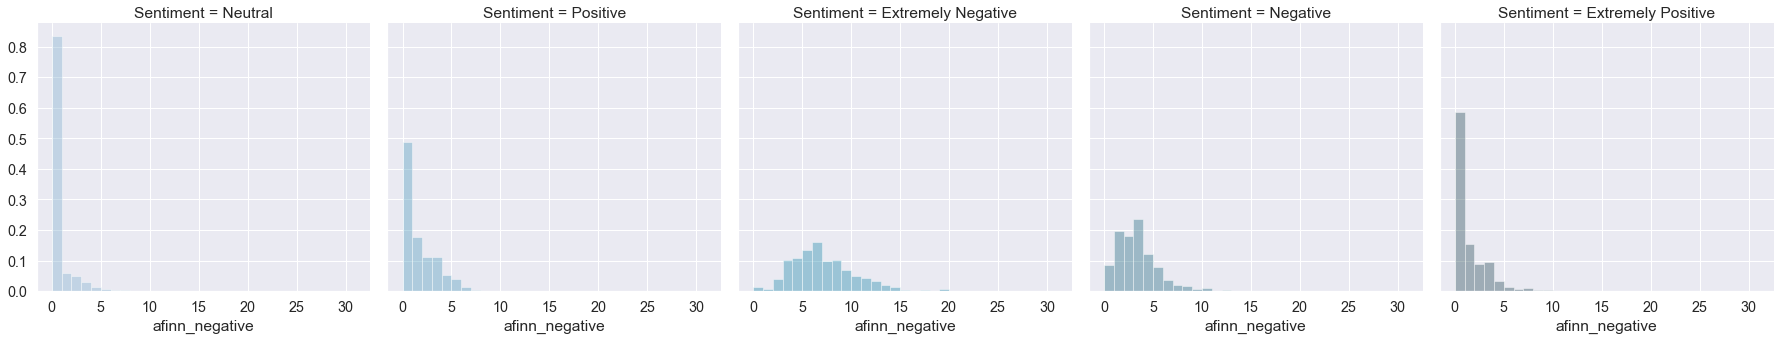

Descriptive stats for nrc_positive
----------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  1.986928  1.432581  0.0  1.0  2.0  3.0   7.0
Extremely Positive  290.0  2.962069  1.725629  0.0  2.0  3.0  4.0   9.0
Negative            513.0  1.904483  1.445845  0.0  1.0  2.0  3.0   8.0
Neutral             356.0  1.286517  1.182948  0.0  0.0  1.0  2.0   7.0
Positive            535.0  2.119626  1.517898  0.0  1.0  2.0  3.0  10.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


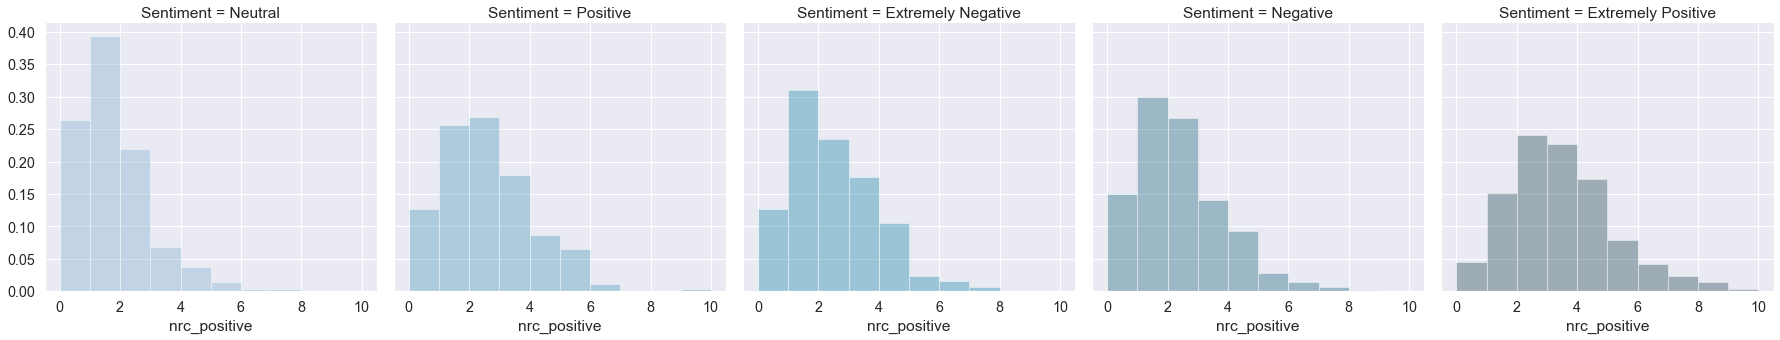

Descriptive stats for nrc_negative
----------------------------------
                    count      mean       std  min  25%  50%   75%  max
Sentiment                                                              
Extremely Negative  306.0  2.637255  1.465153  0.0  2.0  3.0  3.75  7.0
Extremely Positive  290.0  0.858621  1.060788  0.0  0.0  1.0  1.00  6.0
Negative            513.0  1.452242  1.158427  0.0  1.0  1.0  2.00  8.0
Neutral             356.0  0.505618  0.799628  0.0  0.0  0.0  1.00  4.0
Positive            535.0  0.887850  1.036118  0.0  0.0  1.0  1.00  6.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


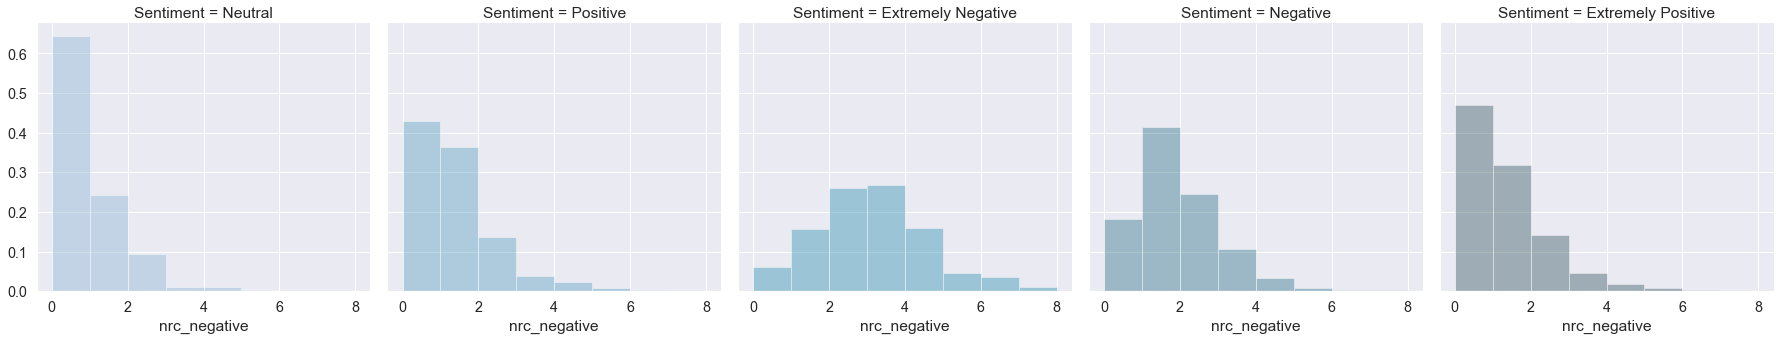

Descriptive stats for nrc_anger
-------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.947712  0.980404  0.0  0.0  1.0  2.0  4.0
Extremely Positive  290.0  0.213793  0.465951  0.0  0.0  0.0  0.0  3.0
Negative            513.0  0.499025  0.739839  0.0  0.0  0.0  1.0  5.0
Neutral             356.0  0.120787  0.389316  0.0  0.0  0.0  0.0  4.0
Positive            535.0  0.246729  0.525442  0.0  0.0  0.0  0.0  3.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


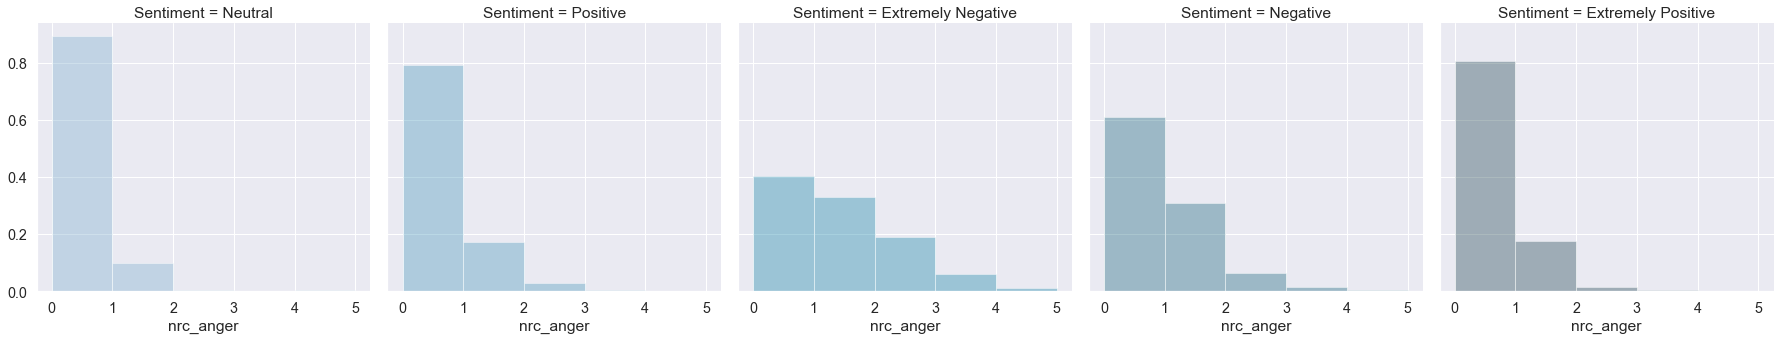

Descriptive stats for nrc_anticipation
--------------------------------------
                    count      mean       std  min   25%  50%  75%  max
Sentiment                                                              
Extremely Negative  306.0  0.908497  1.013738  0.0  0.00  1.0  1.0  6.0
Extremely Positive  290.0  1.351724  1.149882  0.0  0.25  1.0  2.0  5.0
Negative            513.0  1.005848  1.068898  0.0  0.00  1.0  2.0  5.0
Neutral             356.0  0.823034  0.862115  0.0  0.00  1.0  1.0  5.0
Positive            535.0  1.097196  1.095570  0.0  0.00  1.0  2.0  6.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


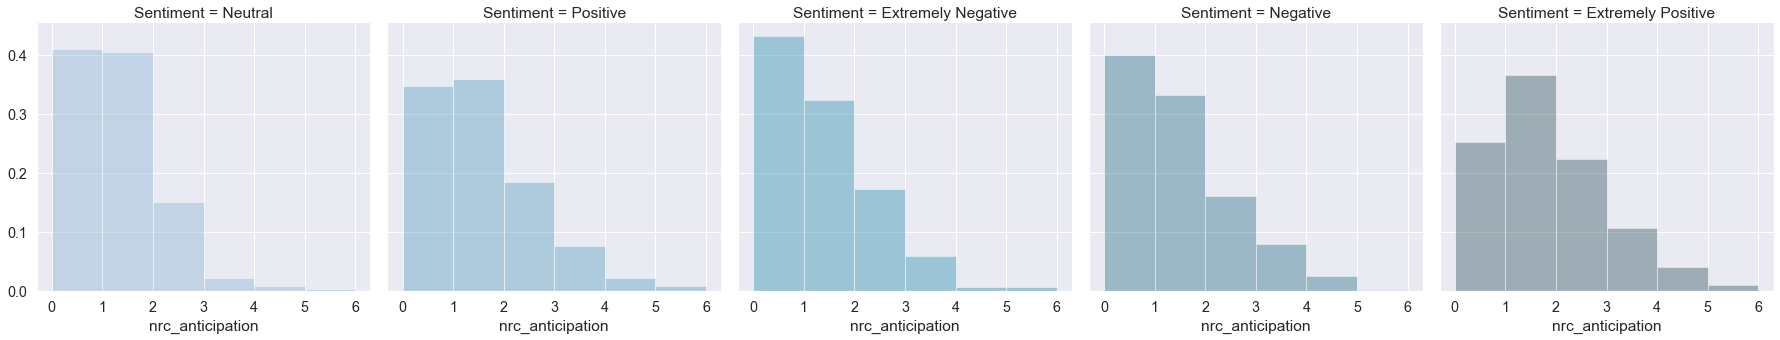

Descriptive stats for nrc_disgust
---------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.666667  0.849301  0.0  0.0  0.0  1.0  4.0
Extremely Positive  290.0  0.155172  0.372113  0.0  0.0  0.0  0.0  2.0
Negative            513.0  0.317739  0.574879  0.0  0.0  0.0  1.0  3.0
Neutral             356.0  0.112360  0.341932  0.0  0.0  0.0  0.0  2.0
Positive            535.0  0.142056  0.399447  0.0  0.0  0.0  0.0  2.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


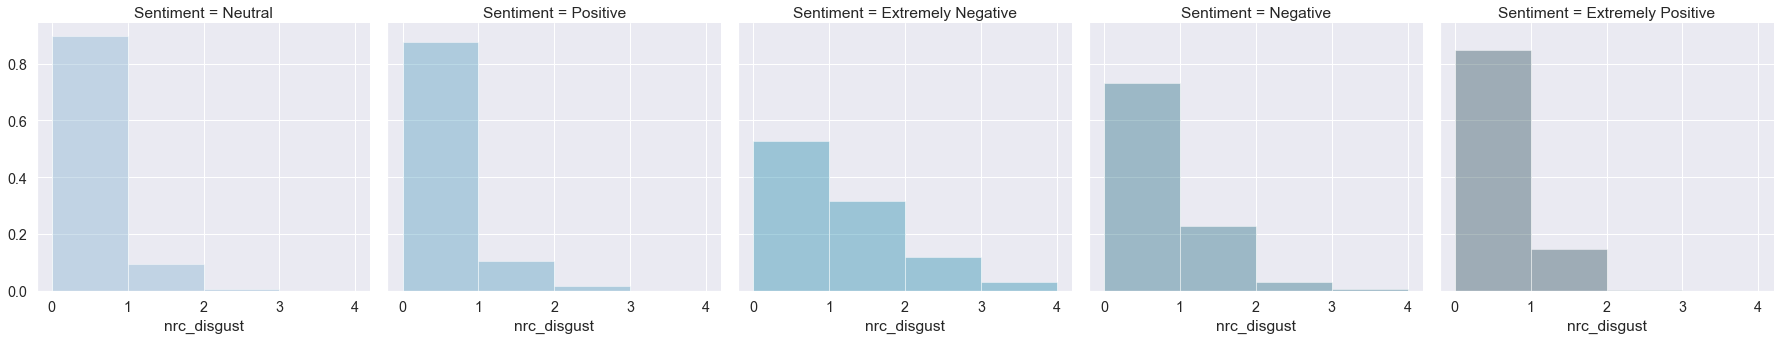

Descriptive stats for nrc_fear
------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  1.663399  1.241799  0.0  1.0  2.0  2.0  6.0
Extremely Positive  290.0  0.579310  0.816516  0.0  0.0  0.0  1.0  5.0
Negative            513.0  0.861598  0.949068  0.0  0.0  1.0  1.0  6.0
Neutral             356.0  0.339888  0.627702  0.0  0.0  0.0  1.0  3.0
Positive            535.0  0.568224  0.840523  0.0  0.0  0.0  1.0  5.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


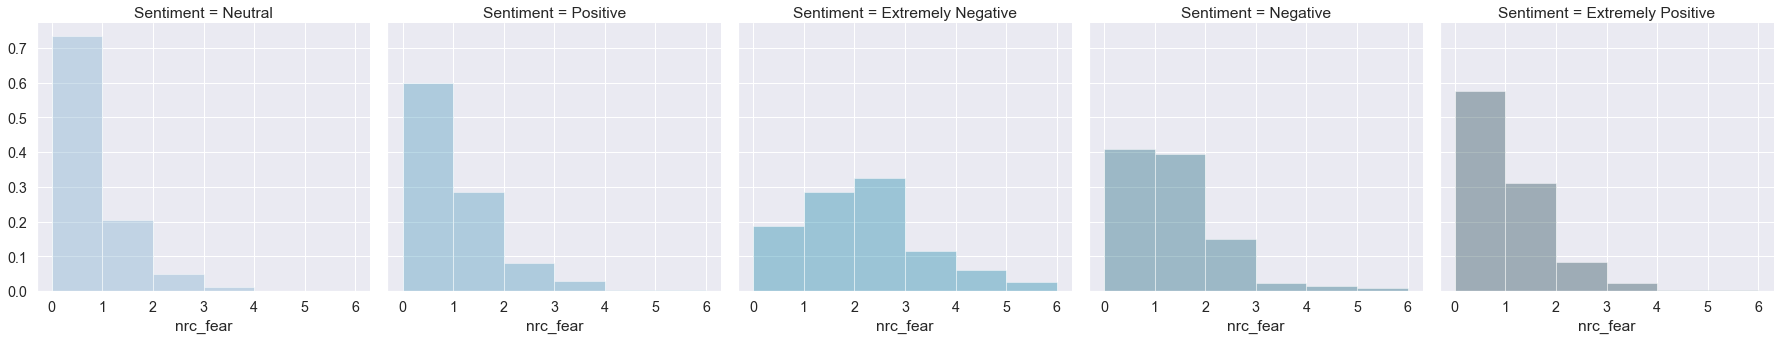

Descriptive stats for nrc_joy
-----------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.833333  0.842518  0.0  0.0  1.0  1.0  3.0
Extremely Positive  290.0  1.186207  1.042264  0.0  0.0  1.0  2.0  5.0
Negative            513.0  0.695906  0.859871  0.0  0.0  1.0  1.0  6.0
Neutral             356.0  0.435393  0.695081  0.0  0.0  0.0  1.0  4.0
Positive            535.0  0.831776  0.870726  0.0  0.0  1.0  1.0  5.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


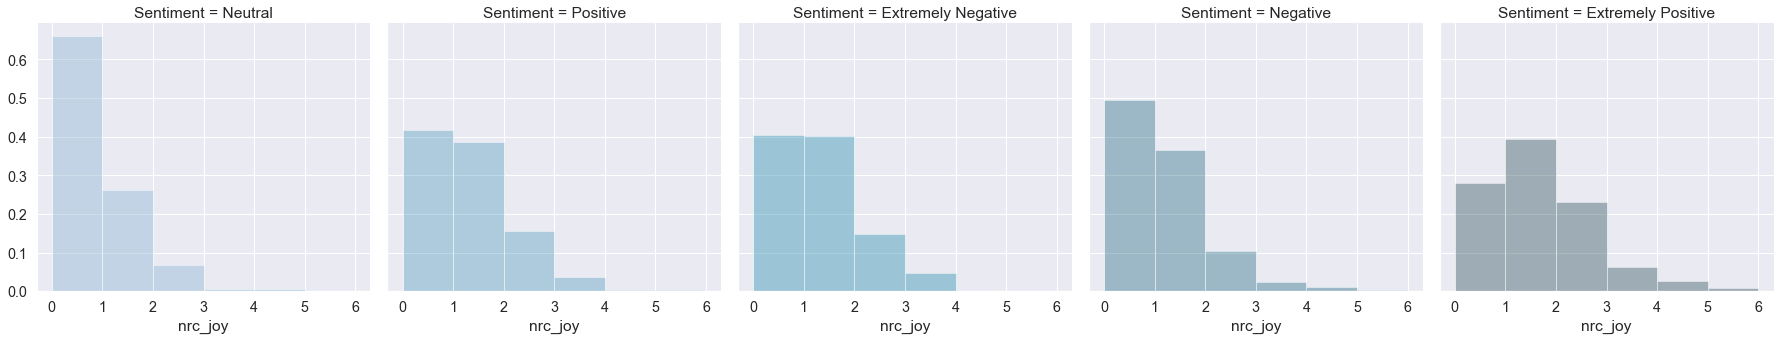

Descriptive stats for nrc_sadness
---------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.947712  0.977054  0.0  0.0  1.0  2.0  6.0
Extremely Positive  290.0  0.358621  0.613300  0.0  0.0  0.0  1.0  3.0
Negative            513.0  0.547758  0.796820  0.0  0.0  0.0  1.0  4.0
Neutral             356.0  0.210674  0.506853  0.0  0.0  0.0  0.0  4.0
Positive            535.0  0.370093  0.660158  0.0  0.0  0.0  1.0  4.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


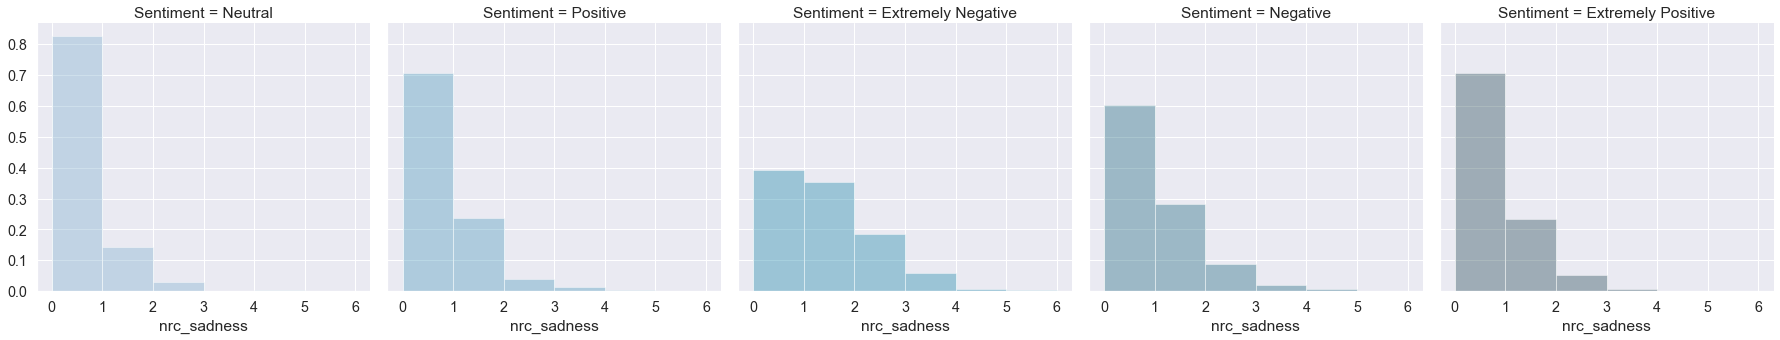

Descriptive stats for nrc_surprise
----------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  0.385621  0.702447  0.0  0.0  0.0  1.0  4.0
Extremely Positive  290.0  0.479310  0.691960  0.0  0.0  0.0  1.0  4.0
Negative            513.0  0.333333  0.586302  0.0  0.0  0.0  1.0  4.0
Neutral             356.0  0.283708  0.504474  0.0  0.0  0.0  1.0  2.0
Positive            535.0  0.411215  0.652757  0.0  0.0  0.0  1.0  4.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


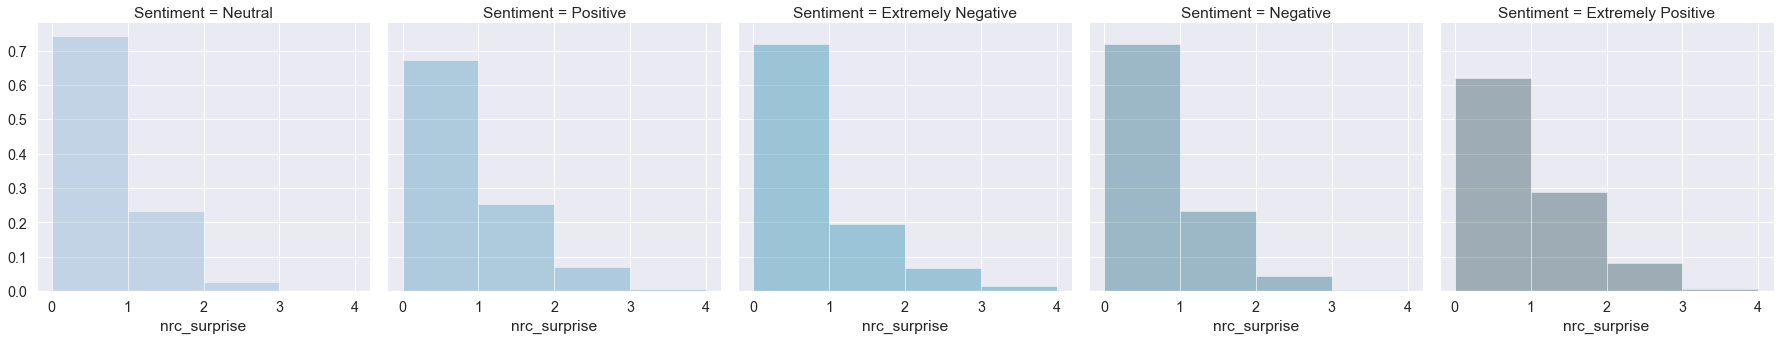

Descriptive stats for nrc_trust
-------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  1.212418  1.106157  0.0  0.0  1.0  2.0  5.0
Extremely Positive  290.0  1.589655  1.304993  0.0  1.0  1.0  2.0  8.0
Negative            513.0  1.146199  1.185883  0.0  0.0  1.0  2.0  8.0
Neutral             356.0  0.716292  0.961726  0.0  0.0  0.0  1.0  4.0
Positive            535.0  1.198131  1.064404  0.0  0.0  1.0  2.0  7.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


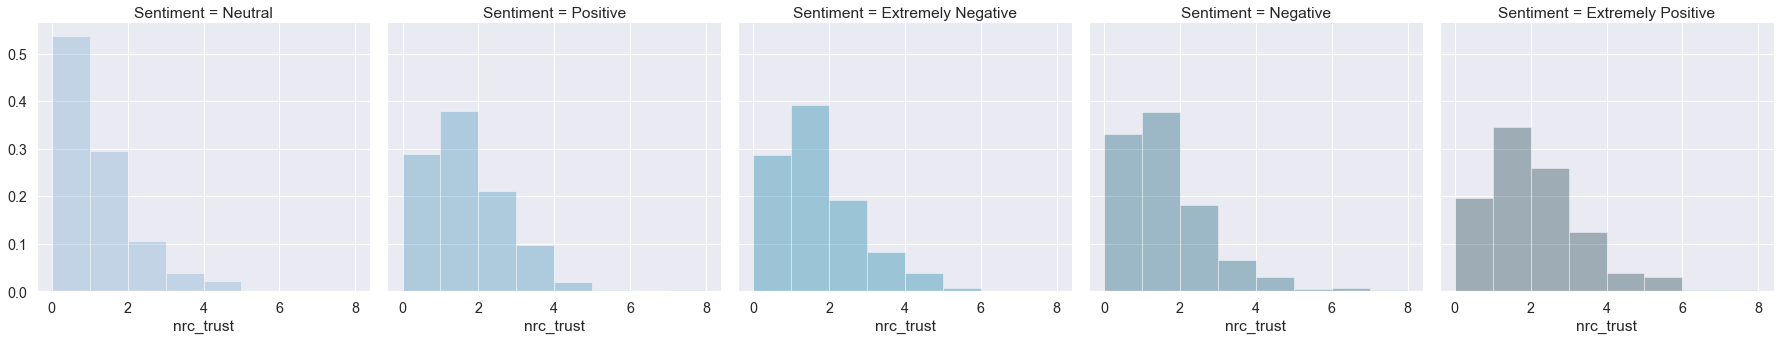

Descriptive stats for mpqa_positive
-----------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  1.418301  1.321273  0.0  0.0  1.0  2.0   6.0
Extremely Positive  290.0  2.975862  1.590229  0.0  2.0  3.0  4.0  10.0
Negative            513.0  1.307992  1.298540  0.0  0.0  1.0  2.0   8.0
Neutral             356.0  0.581461  0.956280  0.0  0.0  0.0  1.0   6.0
Positive            535.0  1.822430  1.288185  0.0  1.0  2.0  3.0   6.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


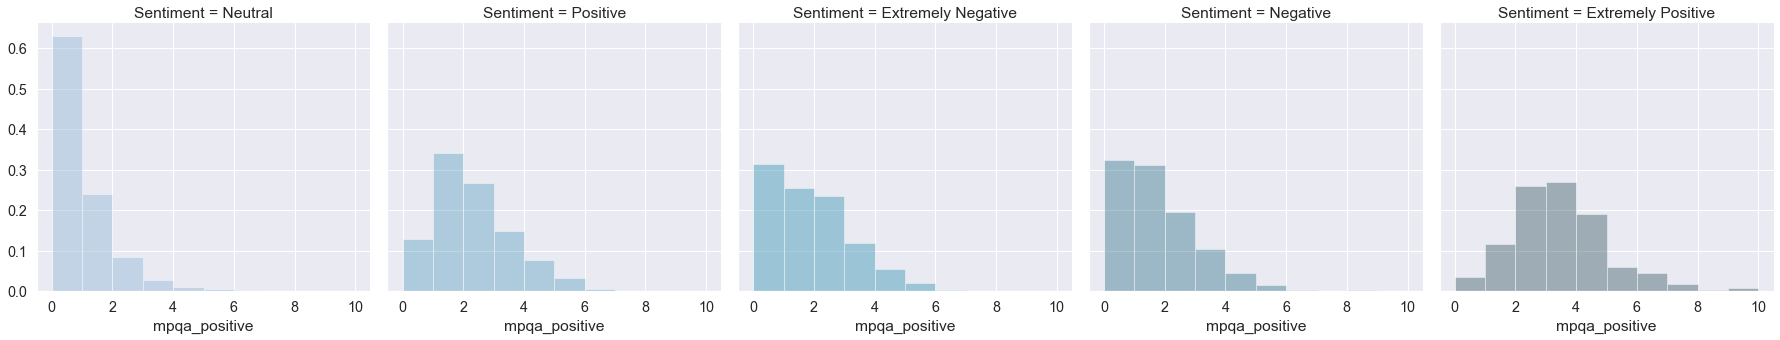

Descriptive stats for mpqa_negative
-----------------------------------
                    count      mean       std  min  25%  50%  75%  max
Sentiment                                                             
Extremely Negative  306.0  2.735294  1.538105  0.0  2.0  3.0  4.0  9.0
Extremely Positive  290.0  0.875862  1.061322  0.0  0.0  1.0  1.0  5.0
Negative            513.0  1.699805  1.262260  0.0  1.0  1.0  2.0  9.0
Neutral             356.0  0.514045  0.778098  0.0  0.0  0.0  1.0  4.0
Positive            535.0  0.975701  1.037395  0.0  0.0  1.0  2.0  7.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


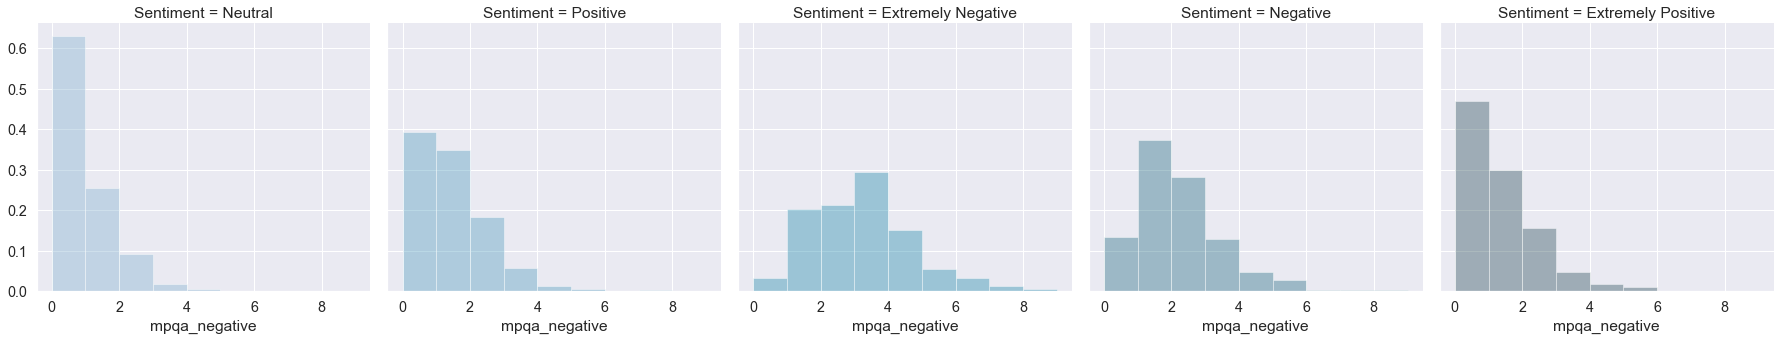

Descriptive stats for mpqa_strong_subjectivty
---------------------------------------------
                    count      mean       std  min  25%  50%  75%   max
Sentiment                                                              
Extremely Negative  306.0  2.663399  1.779971  0.0  1.0  2.0  4.0  10.0
Extremely Positive  290.0  2.165517  1.604551  0.0  1.0  2.0  3.0   8.0
Negative            513.0  1.789474  1.443779  0.0  1.0  2.0  3.0   9.0
Neutral             356.0  0.595506  0.937111  0.0  0.0  0.0  1.0   5.0
Positive            535.0  1.594393  1.340093  0.0  1.0  1.0  2.0   7.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


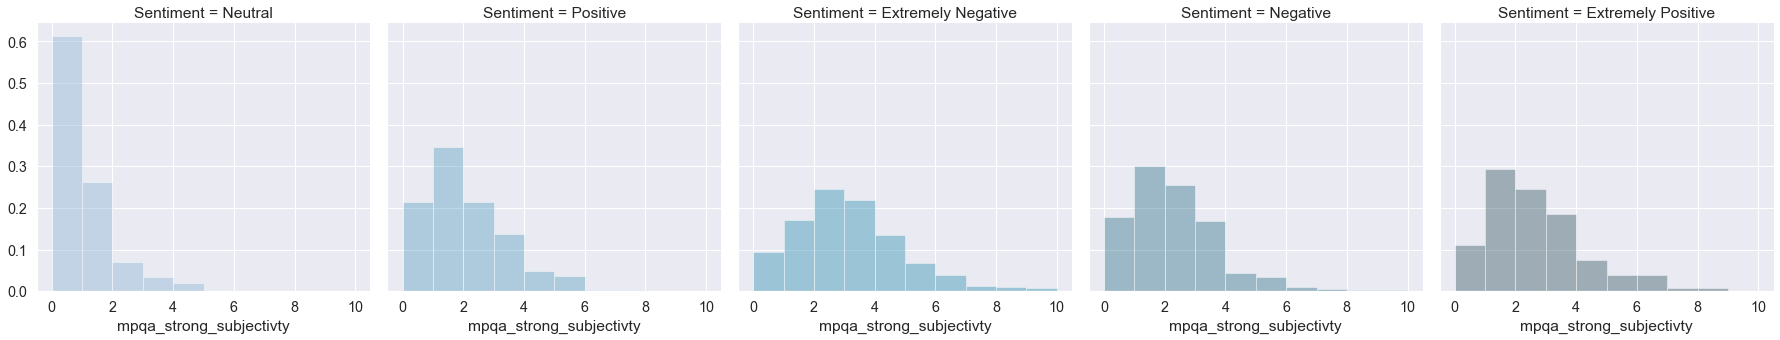

In [18]:

def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('Sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

df_eda = pd.concat([data,feat_dat],axis=1)

for feature in sa_extractor.feature_names:
    show_dist(df_eda, feature)


## Cleaning the text

In [19]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jwang47/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

import re, string, os, emoji

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub(r'\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [41]:
ct = CleanText()
sent_clean = ct.fit_transform(data.OriginalTweet)

In [42]:
print(sent_clean.sample(5))

702     oil price exchang market machin learn network ...
1722    went groceri store yesterday dumb ladi argu cl...
90      call mum dad uk great offer help onlin shop et...
67      sadli misinform think covid give diarrhoea the...
39      go supermarket like without judg coronavirusou...
Name: OriginalTweet, dtype: object


In [43]:
empty_clean = sent_clean == ''
print('{} records have no words left after text cleaning'.format(sent_clean[empty_clean].count()))
sent_clean.loc[empty_clean] = '[no_text]'

4 records have no words left after text cleaning


In [45]:
print(sent_clean.sample(5))

1735    wake husband come home bag groceri store feel ...
1025    uk may enforc isol peopl amp older current pla...
1104    ask grandpar law need groceri store pick donâ...
572     piano technician guild ptg compil advisori exp...
1576    plenti food groceri suppli not donat extra sta...
Name: OriginalTweet, dtype: object


## Create Bag of Words (BOW) representation of the data

/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


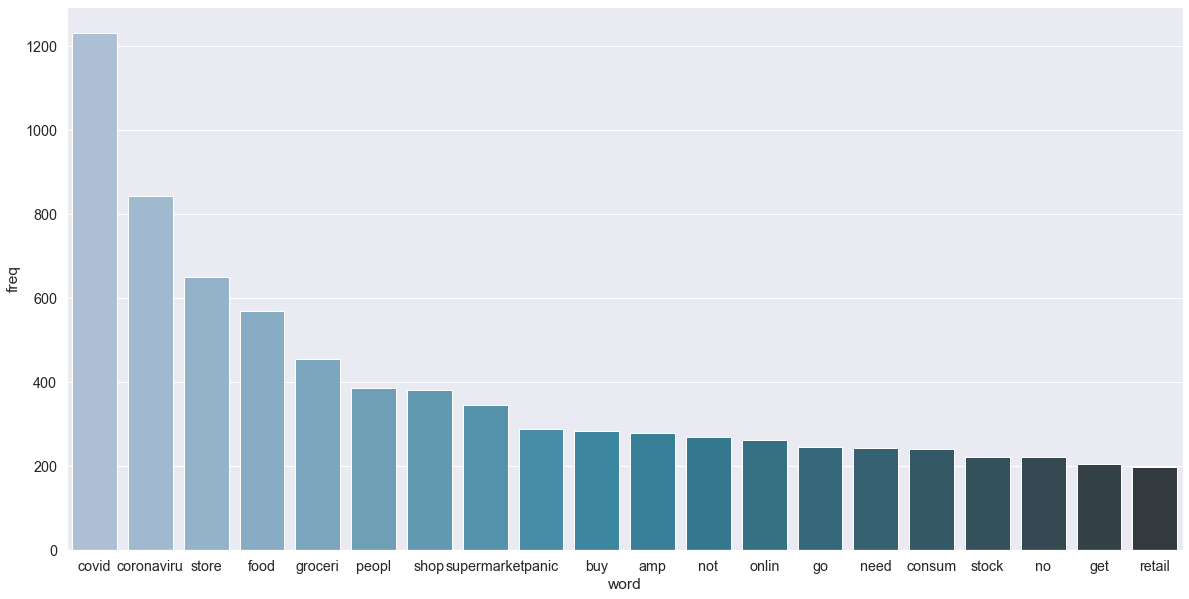

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
import collections

cv = CountVectorizer()
bow = cv.fit_transform(sent_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(20, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [52]:
word_counter_df

,word,freq
0,covid,1232
1,coronaviru,843
2,store,650
3,food,570
4,groceri,456
5,peopl,386
6,shop,382
7,supermarket,346
8,panic,288
9,buy,285


In [47]:
cv.get_feature_names_out()

array(['aa', 'aacounti', 'abandon', ..., 'zuppardo', 'zwoferink', 'zã'],
      dtype=object)

In [48]:
len(cv.get_feature_names_out())

5589

In [49]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
np.shape(bow)

(2000, 5589)

In [53]:
pd.DataFrame(bow.toarray(), columns=list(cv.get_feature_names_out()))["covid"]

0       0
1       0
2       1
3       2
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: covid, Length: 2000, dtype: int64

In [54]:
sent_clean

0                                               [no_text]
1       advic talk neighbour famili exchang phone numb...
2       coronaviru australia woolworth give elderli di...
3       food stock not one empti pleas panic enough fo...
4       readi go supermarket covid outbreak not parano...
                              ...                        
1995    went groceri store today find pasta elimin liv...
1996    world war two stiff upper lip reaction coronav...
1997    never thought would wait line get groceri stor...
1998    visibl less peopl center no sign panic everyon...
1999    time onlin shop boom obstacl smoother schedul ...
Name: OriginalTweet, Length: 2000, dtype: object

In [55]:
df_model = df_eda
df_model['clean_text'] = sent_clean
df_model.columns.tolist()

['OriginalTweet',
 'Sentiment',
 'afinn_positive',
 'afinn_negative',
 'nrc_positive',
 'nrc_negative',
 'nrc_anger',
 'nrc_anticipation',
 'nrc_disgust',
 'nrc_fear',
 'nrc_joy',
 'nrc_sadness',
 'nrc_surprise',
 'nrc_trust',
 'mpqa_positive',
 'mpqa_negative',
 'mpqa_strong_subjectivty',
 'clean_text']

In [56]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, **transform_params):
        return X[self.cols]

    def fit(self, X, y=None, **fit_params):
        return self

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Sentiment', axis=1), df_model.Sentiment, test_size=0.1, random_state=30)

## Train classifiers using cross-validation

In [62]:
df_model.dtypes

OriginalTweet               object
Sentiment                   object
afinn_positive             float64
afinn_negative             float64
nrc_positive               float64
nrc_negative               float64
nrc_anger                  float64
nrc_anticipation           float64
nrc_disgust                float64
nrc_fear                   float64
nrc_joy                    float64
nrc_sadness                float64
nrc_surprise               float64
nrc_trust                  float64
mpqa_positive              float64
mpqa_negative              float64
mpqa_strong_subjectivty    float64
clean_text                  object
dtype: object

In [63]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

mnb = MultinomialNB()
logreg = LogisticRegression(max_iter=10000, solver='saga')
countvect = CountVectorizer()



### Define grid-search routine to perform the cross-validation

In [64]:
from pprint import pprint
from time import time

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

def grid_vect(clf, parameters_clf, X_train, X_test, y_train, y_test, parameters_text=None, vect=None):
    
    textcountscols = ['afinn_positive', 'afinn_negative', 'nrc_positive', 'nrc_negative', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust',
                     'nrc_fear', 'nrc_joy', 'nrc_sadness', 'nrc_surprise', 'nrc_trust', 'mpqa_positive', 'mpqa_negative', 'mpqa_strong_subjectivty']
    
    features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)
  
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)

    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)

    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [65]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}

# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

# Parameter grid settings for MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}



### LogisticRegression

In [66]:
# LogisticRegression
best_logreg_countvect = grid_vect(logreg, parameters_logreg, X_train, X_test, y_train, y_test, parameters_text=parameters_vect, vect=countvect)



Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
done in 642.821s

Best CV score: 0.644
Best parameters set:
	clf__C: 0.25
	clf__penalty: 'l1'
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.635


Classification Report Test Data
                    precision    recall  f1-score   support

Extremely Negative       0.81      0.71      0.76        31
Extremely Positive       0.83      0.58      0.68        33
          Negative       0.57      0.48      0.52        50
           Neutral       0.58      0.91      0.71        35
          Positive       0.57      0.59      0.58        51

          accuracy  

In [69]:
logreg_test_preds = X_test.loc[:, ['OriginalTweet']]
logreg_test_preds['Sentiment']=y_test
logreg_test_preds['pred']=best_logreg_countvect.predict(X_test)
logreg_test_preds

,OriginalTweet,Sentiment,pred
1856,"Guess?, Inc. Provides COVID-19 Business Update...",Positive,Positive
364,Economic Perspectives - Global Inflation Persp...,Negative,Positive
1948,@NewYorker My friends in #Strasbourg #france s...,Positive,Positive
1458,9 Online Grocery Shopping Stores In Klang Vall...,Neutral,Neutral
609,@DrAmalinaBakri Saw someone shared on what kin...,Positive,Positive
...,...,...,...
1992,"@N_Mazibuk0 Let's all be accurate, there's NO ...",Extremely Negative,Extremely Negative
1942,I donÂt want to work at a grocery store anymo...,Positive,Positive
470,"Oh my God, even after coming up with a list of...",Negative,Extremely Negative
314,Shit moms.. I just got done telling my kids ho...,Positive,Positive


### Estimate Naive Bayes model

In [71]:
mnb = MultinomialNB()
countvect = CountVectorizer()

# MultinomialNB
best_mnb_countvect = grid_vect(mnb, parameters_mnb, X_train, X_test, y_train, y_test, parameters_text=parameters_vect, vect=countvect)

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
done in 5.106s

Best CV score: 0.527
Best parameters set:
	clf__alpha: 0.75
	features__pipe__vect__max_df: 0.75
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.570


Classification Report Test Data
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.65      0.60        31
Extremely Positive       0.59      0.52      0.55        33
          Negative       0.50      0.48      0.49        50
           Neutral       0.75      0.69      0.72        35
          Positive       0.53      0.57      0.55        51

          accuracy                           0.57       200
    

In [72]:
mnb_test_preds = X_test.loc[:, ['OriginalTweet']]
mnb_test_preds['Sentiment']=y_test
mnb_test_preds['pred']=best_mnb_countvect.predict(X_test)
mnb_test_preds

,OriginalTweet,Sentiment,pred
1856,"Guess?, Inc. Provides COVID-19 Business Update...",Positive,Neutral
364,Economic Perspectives - Global Inflation Persp...,Negative,Extremely Negative
1948,@NewYorker My friends in #Strasbourg #france s...,Positive,Positive
1458,9 Online Grocery Shopping Stores In Klang Vall...,Neutral,Neutral
609,@DrAmalinaBakri Saw someone shared on what kin...,Positive,Positive
...,...,...,...
1992,"@N_Mazibuk0 Let's all be accurate, there's NO ...",Extremely Negative,Extremely Negative
1942,I donÂt want to work at a grocery store anymo...,Positive,Positive
470,"Oh my God, even after coming up with a list of...",Negative,Extremely Negative
314,Shit moms.. I just got done telling my kids ho...,Positive,Negative


## Bonus Point: 2-Grams

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [129]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(sent_clean)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)


,tfidf
no_text,1.0
aa,0.0
pocket,0.0
poison,0.0
pointless,0.0
...,...
fish,0.0
fiscal,0.0
firstâ,0.0
firstrespond,0.0


/Users/jwang47/opt/anaconda3/envs/dsfb2env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


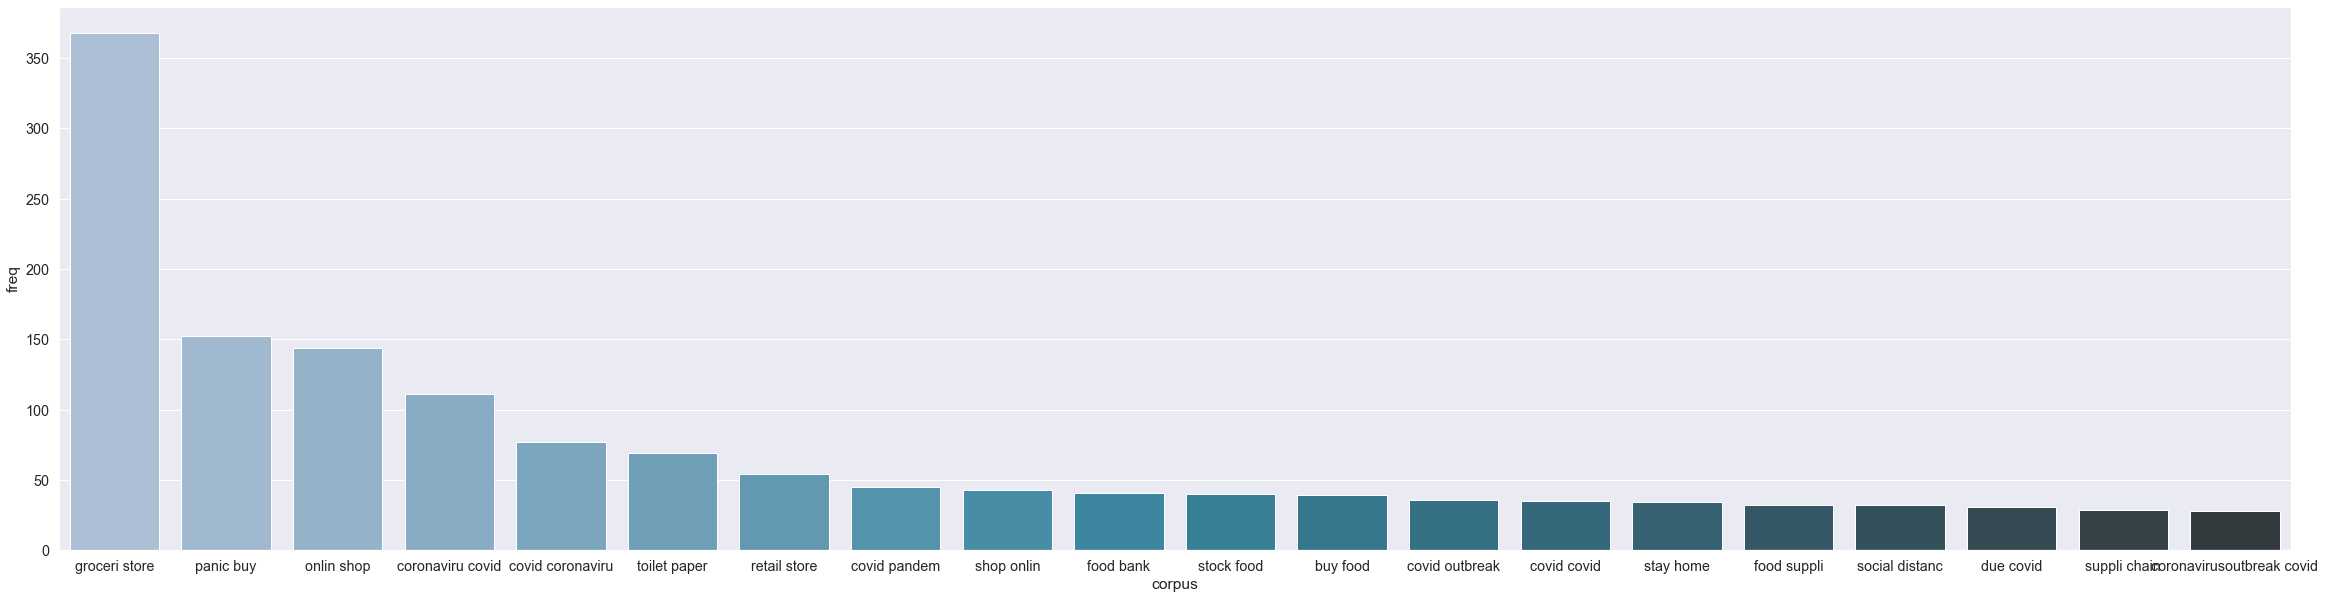

In [135]:
boN = CountVectorizer(ngram_range = (2, 2))
boN_corpus = boN.fit_transform(sent_clean)

corpus_freq = dict(zip(boN.get_feature_names(), np.asarray(boN_corpus.sum(axis=0)).ravel()))
corpus_counter = collections.Counter(corpus_freq)
corpus_counter_df = pd.DataFrame(corpus_counter.most_common(20), columns = ['corpus', 'freq'])

fig, ax = plt.subplots(figsize=(40, 10))
bar_freq_corpus = sns.barplot(x="corpus", y="freq", data=corpus_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [134]:
corpus_counter_df

,corpus,freq
0,groceri store,368
1,panic buy,152
2,onlin shop,144
3,coronaviru covid,111
4,covid coronaviru,77
5,toilet paper,69
6,retail store,54
7,covid pandem,45
8,shop onlin,43
9,food bank,41
